In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
%matplotlib inline

import matplotlib.pyplot as plt
#from keras.optimizers import Adam

In [2]:
#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [3]:
application_df.USE_CASE.value_counts()

Preservation     28095
ProductDev        5671
CommunityServ      384
Heathcare          146
Other                3
Name: USE_CASE, dtype: int64

## Attempt 1: Drop more columns

In [4]:
# Optimization Iteration 1: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS'], inplace=True)
# Optimization Iteration 2: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'SPECIAL_CONSIDERATIONS', 'AFFILIATION'], inplace=True)
# Optimization Iteration 3: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'ORGANIZATION'], inplace=True)
# Optimization Iteration 3: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'ORGANIZATION', 'USE_CASE'], inplace=True)
# Optimization Iteration 3: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'ORGANIZATION', 'USE_CASE', 'INCOME_AMT'], inplace=True)
# Optimization Iteration 3: Drop more columns
# application_df.drop(columns=['EIN','NAME', 'STATUS', 'ASK_AMT'], inplace=True)
# Optimization Iteration 3: Drop more columns
application_df.drop(columns=['EIN','NAME', 'STATUS'], inplace=True)

In [5]:
# Determine the number of unique values in each column.
# Generate our categorical variable list
application_unique = application_df.dtypes.index.tolist()
application_df[application_unique].nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
application_type_counts = application_df.APPLICATION_TYPE.value_counts()

In [7]:
application_type_counts_df = pd.DataFrame(application_type_counts)
application_type_counts_df.index.name = 'App_ID'

In [8]:
app_type_count = application_df.groupby(['APPLICATION_TYPE', 'IS_SUCCESSFUL'])
app_type_count = app_type_count.size()
app_type_count = app_type_count.reset_index(name='Observation')
app_type_count= app_type_count[app_type_count['IS_SUCCESSFUL']==1]
app_type_count.rename(columns={'APPLICATION_TYPE':'App_ID'}, inplace=True)

In [9]:
app_type_count= pd.merge(application_type_counts_df, app_type_count, on = 'App_ID' )

In [10]:
app_type_count['Success_Rate'] =(app_type_count['Observation']/app_type_count['APPLICATION_TYPE'])*100
app_type_count

,App_ID,APPLICATION_TYPE,IS_SUCCESSFUL,Observation,Success_Rate
0,T3,27037,1,14388,53.215963
1,T4,1542,1,471,30.544747
2,T6,1216,1,900,74.013158
3,T5,1173,1,900,76.726343
4,T19,1065,1,201,18.873239
5,T8,737,1,311,42.198100
6,T7,725,1,410,56.551724
7,T10,528,1,464,87.878788
8,T9,156,1,112,71.794872
9,T13,66,1,61,92.424242


In [11]:
app_type_counts= app_type_count[['App_ID', 'Success_Rate']]
app_type_counts.set_index("App_ID", inplace=True)
series = pd.Series(app_type_counts['Success_Rate'], index=app_type_counts.index)

## Attempt 2: Create more bins for rare occurrences

In [12]:
# Determine which values to replace for rare application type occurrences
replace_application = list(series[series> 80 ].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
Other      629
T9         156
T2          16
T25          3
Name: APPLICATION_TYPE, dtype: int64

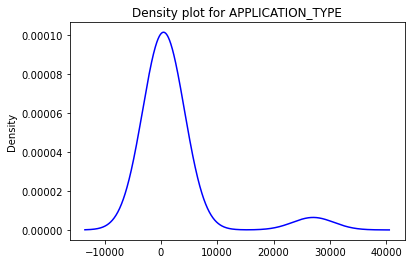

In [13]:
#application_df.APPLICATION_TYPE.plot
application_type_counts.plot.density(color='blue', legend=False)
plt.title('Density plot for APPLICATION_TYPE')
plt.show()

In [14]:
# Determine which values to replace if counts are less than 500?
# replace_application = list(application_type_counts[application_type_counts < 750].index)

# # Replace in dataframe
# for app in replace_application:
#     application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# # Check to make sure binning was successful
# application_df.APPLICATION_TYPE.value_counts()

In [15]:
# Look at CLASSIFICATION value counts for binning
classification_counts = application_df.CLASSIFICATION.value_counts()

# Check the number of unique values in each column
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

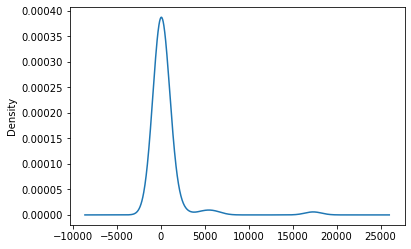

In [16]:
# Visualize the value counts of CLASSIFICATION
classification_counts.plot.density()

In [17]:
# Determine which values to replace if counts are less than 1000?
replace_class = list(classification_counts[classification_counts < 500].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

In [18]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Check the number of unique values in each column
application_df[application_cat].nunique()

APPLICATION_TYPE          11
AFFILIATION                6
CLASSIFICATION             7
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [19]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [20]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T19,APPLICATION_TYPE_T2,APPLICATION_TYPE_T25,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,5000,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,108590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,5000,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,6692,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,142590,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [21]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,  stratify=y)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
len(X_train_scaled[0])

45

## Attempt3: Increase number of hidden layers and change activation functions

In [24]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 =  90
hidden_nodes_layer2 = 50
hidden_nodes_layer3 = 25
# hidden_nodes_layer4 = 11
# hidden_nodes_layer5 = 5
# hidden_nodes_layer6 = 2

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="ReLU")
)

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="ReLU"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# # Fourth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation="ReLU"))

# # Fifth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation="sigmoid"))

# # Sixth hidden layer
# nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation="ReLU"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 90)                4140      
_________________________________________________________________
dense_1 (Dense)              (None, 50)                4550      
_________________________________________________________________
dense_2 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 26        
Total params: 9,991
Trainable params: 9,991
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("optimized_checkpoints/",exist_ok=True)
checkpoint_path = "optimized_checkpoints/weights.{epoch:02d}.hdf5"

In [26]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [27]:
# Create a callback that saves the model's weights every 5 epochs
cp_callback = ModelCheckpoint(filepath=checkpoint_path, verbose=1, save_weights_only=True, save_freq=5)
# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 4:38 - loss: 0.7329 - accuracy: 0.4375
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.7078 - accuracy: 0.4543  
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
 26/804 [..............................] - ETA: 3s - loss: 0.6962 - accuracy: 0.5060
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6782 - accuracy: 0.5709
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimi


Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.5848 - accuracy: 0.7084
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.5840 - accuracy: 0.7091
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
461/804 [================>.............] - ETA: 1s - loss: 0.5824 - accuracy: 0.7099
Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5

Epoch 00001: saving model to optimized_checkpoints\weights.01.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.5817 - 


Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5517 - accuracy: 0.7326
Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5515 - accuracy: 0.7329
Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5514 - accuracy: 0.7328
Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5

Epoch 00002: saving model to optimized_checkpoints\weights.02.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5512 - 


Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5466 - accuracy: 0.7357
Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.5467 - accuracy: 0.7357
Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5469 - accuracy: 0.7355
Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5

Epoch 00003: saving model to optimized_checkpoints\weights.03.hdf5


134/804 [====>.........................] - ETA: 2s - loss: 0.5459 - accuracy: 0.7304
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
149/804 [====>.........................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7322
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5413 - accuracy: 0.7351
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7348
Epoch 00004: saving model to optimized_checkpoints\


Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5499 - accuracy: 0.7316
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5494 - accuracy: 0.7324
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5486 - accuracy: 0.7332
Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5

Epoch 00004: saving model to optimized_checkpoints\weights.04.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5489 - 


Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5488 - accuracy: 0.7322
Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5481 - accuracy: 0.7327
Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.5484 - accuracy: 0.7325
Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5

Epoch 00005: saving model to optimized_checkpoints\weights.05.hdf5


226/804 [=======>......................] - ETA: 2s - loss: 0.5546 - accuracy: 0.7316
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7326
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5533 - accuracy: 0.7324
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5544 - accuracy: 0.7320
Epoch 00006: saving model to optimized_checkpoints\


Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5490 - accuracy: 0.7340
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5484 - accuracy: 0.7344
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5487 - accuracy: 0.7342
Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5

Epoch 00006: saving model to optimized_checkpoints\weights.06.hdf5



Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
277/804 [=========>....................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7382
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
292/804 [=========>....................] - ETA: 1s - loss: 0.5414 - accuracy: 0.7391
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
307/804 [==========>...................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7397
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5


697/804 [=========================>....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7352
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5445 - accuracy: 0.7354
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5450 - accuracy: 0.7353
Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5

Epoch 00007: saving model to optimized_checkpoints\weights.07.hdf5
742/804 [==========================>...] - ETA: 0s - loss: 0.5451 - accuracy: 0.7351
Epoch 00007: saving model to optimized_checkpoints\


Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5445 - accuracy: 0.7356
Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5441 - accuracy: 0.7362
Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5444 - accuracy: 0.7357
Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5

Epoch 00008: saving model to optimized_checkpoints\weights.08.hdf5


359/804 [============>.................] - ETA: 1s - loss: 0.5412 - accuracy: 0.7391
Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5421 - accuracy: 0.7374
Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5410 - accuracy: 0.7377
Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5417 - accuracy: 0.7376
Epoch 00009: saving model to optimized_checkpoints\


Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.7344
Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5

Epoch 00009: saving model to optimized_checkpoints\weights.09.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5448 - accuracy: 0.7345
Epoch 10/100
  1/804 [..............................] - ETA: 1s - loss: 0.5069 - accuracy: 0.8125
Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5

Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5

Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5350 - accuracy: 0.7542
Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5

Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5

Epoch 00010: saving model to optimized_checkpoints\weights.10.hdf5
 30/804 [>........................


Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5568 - accuracy: 0.7218
Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7296
Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7331
Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5

Epoch 00011: saving model to optimized_checkpoints\weights.11.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5459 - 


Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5257 - accuracy: 0.7509
Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7482
Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5285 - accuracy: 0.7448
Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5

Epoch 00012: saving model to optimized_checkpoints\weights.12.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5331 - 


Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5439 - accuracy: 0.7315
Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5460 - accuracy: 0.7303
Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5470 - accuracy: 0.7295
Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5

Epoch 00013: saving model to optimized_checkpoints\weights.13.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5444 - 


Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
164/804 [=====>........................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7351
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5465 - accuracy: 0.7338
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5467 - accuracy: 0.7334
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5


584/804 [====================>.........] - ETA: 0s - loss: 0.5418 - accuracy: 0.7357
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5425 - accuracy: 0.7352
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5428 - accuracy: 0.7356
Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5

Epoch 00014: saving model to optimized_checkpoints\weights.14.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5426 - accuracy: 0.7357
Epoch 00014: saving model to optimized_checkpoints\

205/804 [======>.......................] - ETA: 2s - loss: 0.5384 - accuracy: 0.7415
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
219/804 [=======>......................] - ETA: 2s - loss: 0.5377 - accuracy: 0.7424
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
230/804 [=======>......................] - ETA: 2s - loss: 0.5365 - accuracy: 0.7432
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
245/804 [========>.....................] - ETA: 2s - loss: 0.5375 - accuracy: 0.7413
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\


Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.5425 - accuracy: 0.7366
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.5427 - accuracy: 0.7364
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5424 - accuracy: 0.7364
Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5

Epoch 00015: saving model to optimized_checkpoints\weights.15.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5427 - 


Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5441 - accuracy: 0.7316
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
271/804 [=========>....................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7335
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5423 - accuracy: 0.7328
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5


676/804 [========================>.....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7394
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7389
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7380
Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5

Epoch 00016: saving model to optimized_checkpoints\weights.16.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7377
Epoch 00016: saving model to optimized_checkpoints\


Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7358
Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5
312/804 [==========>...................] - ETA: 1s - loss: 0.5426 - accuracy: 0.7357
Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5419 - accuracy: 0.7365
Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5

Epoch 00017: saving model to optimized_checkpoints\weights.17.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5426 - 


Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5396 - accuracy: 0.7381
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
358/804 [============>.................] - ETA: 1s - loss: 0.5399 - accuracy: 0.7380
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5406 - accuracy: 0.7373
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5


763/804 [===========================>..] - ETA: 0s - loss: 0.5404 - accuracy: 0.7377
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5403 - accuracy: 0.7379
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7379
Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5

Epoch 00018: saving model to optimized_checkpoints\weights.18.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5407 - accuracy: 0.7374
Epoch 19/100
  1/804 [..............................] - ETA: 1s - loss: 0.5127 - accuracy: 0.7812
Epoch 00019: savi


Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5361 - accuracy: 0.7408
Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5
404/804 [==============>...............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7427
Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5336 - accuracy: 0.7429
Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5

Epoch 00019: saving model to optimized_checkpoints\weights.19.hdf5


Epoch 20/100
  1/804 [..............................] - ETA: 1s - loss: 0.5398 - accuracy: 0.6250
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
 15/804 [..............................] - ETA: 2s - loss: 0.5532 - accuracy: 0.7208
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
 30/804 [>.............................] - ETA: 2s - loss: 0.5434 - accuracy: 0.7302
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5550 - accuracy: 0.7146
Epoch 00020: saving model to optimized


Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5375 - accuracy: 0.7399
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.5365 - accuracy: 0.7406
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5368 - accuracy: 0.7405
Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5

Epoch 00020: saving model to optimized_checkpoints\weights.20.hdf5


 46/804 [>.............................] - ETA: 2s - loss: 0.5303 - accuracy: 0.7541
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7449
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
 76/804 [=>............................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7442
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7466
Epoch 00021: saving model to optimized_checkpoints\


Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5369 - accuracy: 0.7404
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5380 - accuracy: 0.7393
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7390
Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5

Epoch 00021: saving model to optimized_checkpoints\weights.21.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5377 - 


Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7451
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
117/804 [===>..........................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7390
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7396
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5


522/804 [==================>...........] - ETA: 1s - loss: 0.5415 - accuracy: 0.7347
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5420 - accuracy: 0.7347
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
552/804 [===================>..........] - ETA: 0s - loss: 0.5423 - accuracy: 0.7341
Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5

Epoch 00022: saving model to optimized_checkpoints\weights.22.hdf5
567/804 [====================>.........] - ETA: 0s - loss: 0.5415 - accuracy: 0.7350
Epoch 00022: saving model to optimized_checkpoints\


Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5412 - accuracy: 0.7356
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5426 - accuracy: 0.7333
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5415 - accuracy: 0.7353
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5


568/804 [====================>.........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7350
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
583/804 [====================>.........] - ETA: 0s - loss: 0.5413 - accuracy: 0.7352
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5412 - accuracy: 0.7355
Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5

Epoch 00023: saving model to optimized_checkpoints\weights.23.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5406 - accuracy: 0.7361
Epoch 00023: saving model to optimized_checkpoints\


Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7432
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5322 - accuracy: 0.7445
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7437
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5


614/804 [=====================>........] - ETA: 0s - loss: 0.5397 - accuracy: 0.7382
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5392 - accuracy: 0.7389
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7392
Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5

Epoch 00024: saving model to optimized_checkpoints\weights.24.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7389
Epoch 00024: saving model to optimized_checkpoints\


Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5427 - accuracy: 0.7388
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5424 - accuracy: 0.7391
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5432 - accuracy: 0.7382
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5425 - 


Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.5404 - accuracy: 0.7374
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.5399 - accuracy: 0.7380
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5
700/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7378
Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5

Epoch 00025: saving model to optimized_checkpoints\weights.25.hdf5



Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5
286/804 [=========>....................] - ETA: 1s - loss: 0.5344 - accuracy: 0.7403
Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5
301/804 [==========>...................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7402
Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5
316/804 [==========>...................] - ETA: 1s - loss: 0.5343 - accuracy: 0.7390
Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5

Epoch 00026: saving model to optimized_checkpoints\weights.26.hdf5
331/804 [===========>..................] - ETA: 1s - loss: 0.5329 - 


Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5
327/804 [===========>..................] - ETA: 1s - loss: 0.5376 - accuracy: 0.7383
Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5
342/804 [===========>..................] - ETA: 1s - loss: 0.5372 - accuracy: 0.7384
Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5
357/804 [============>.................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7384
Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5

Epoch 00027: saving model to optimized_checkpoints\weights.27.hdf5
372/804 [============>.................] - ETA: 1s - loss: 0.5381 - 


Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5
373/804 [============>.................] - ETA: 1s - loss: 0.5369 - accuracy: 0.7391
Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5
388/804 [=============>................] - ETA: 1s - loss: 0.5379 - accuracy: 0.7386
Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 0.5391 - accuracy: 0.7381
Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5


793/804 [============================>.] - ETA: 0s - loss: 0.5382 - accuracy: 0.7385
Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5

Epoch 00028: saving model to optimized_checkpoints\weights.28.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5380 - accuracy: 0.7385
Epoch 29/100
  1/804 [..............................] - ETA: 1s - loss: 0.4555 - accuracy: 0.7500
Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5
 14/804 [..............................] - ETA: 3s - loss: 0.5393 - accuracy: 0.7589
Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5443 - accuracy: 0.7371
Epoch 00029: savi


Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.5360 - accuracy: 0.7390
Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5
434/804 [===============>..............] - ETA: 1s - loss: 0.5357 - accuracy: 0.7396
Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5349 - accuracy: 0.7405
Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5

Epoch 00029: saving model to optimized_checkpoints\weights.29.hdf5


 30/804 [>.............................] - ETA: 2s - loss: 0.5292 - accuracy: 0.7458
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
 45/804 [>.............................] - ETA: 2s - loss: 0.5167 - accuracy: 0.7500
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
 60/804 [=>............................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7536
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5249 - accuracy: 0.7479
Epoch 00030: saving model to optimized_checkpoints\


Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.5381 - accuracy: 0.7381
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.5373 - accuracy: 0.7384
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7390
Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5

Epoch 00030: saving model to optimized_checkpoints\weights.30.hdf5


 76/804 [=>............................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7385
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
 91/804 [==>...........................] - ETA: 2s - loss: 0.5407 - accuracy: 0.7339
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
106/804 [==>...........................] - ETA: 2s - loss: 0.5420 - accuracy: 0.7350
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
121/804 [===>..........................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7358
Epoch 00031: saving model to optimized_checkpoints\


Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7389
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5366 - accuracy: 0.7391
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5377 - accuracy: 0.7386
Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5

Epoch 00031: saving model to optimized_checkpoints\weights.31.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5373 - 


Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5
132/804 [===>..........................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7436
Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5
147/804 [====>.........................] - ETA: 2s - loss: 0.5307 - accuracy: 0.7430
Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5
162/804 [=====>........................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7431
Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5

Epoch 00032: saving model to optimized_checkpoints\weights.32.hdf5


163/804 [=====>........................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7393
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
178/804 [=====>........................] - ETA: 2s - loss: 0.5395 - accuracy: 0.7395
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
193/804 [======>.......................] - ETA: 2s - loss: 0.5388 - accuracy: 0.7404
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
208/804 [======>.......................] - ETA: 2s - loss: 0.5387 - accuracy: 0.7402
Epoch 00033: saving model to optimized_checkpoints\


Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
598/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7362
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.5399 - accuracy: 0.7364
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7377
Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5

Epoch 00033: saving model to optimized_checkpoints\weights.33.hdf5


209/804 [======>.......................] - ETA: 2s - loss: 0.5370 - accuracy: 0.7404
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7405
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7391
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.5376 - accuracy: 0.7387
Epoch 00034: saving model to optimized_checkpoints\


Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5387 - accuracy: 0.7390
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5391 - accuracy: 0.7384
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7388
Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5

Epoch 00034: saving model to optimized_checkpoints\weights.34.hdf5


255/804 [========>.....................] - ETA: 2s - loss: 0.5316 - accuracy: 0.7409
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
270/804 [=========>....................] - ETA: 1s - loss: 0.5307 - accuracy: 0.7420
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
285/804 [=========>....................] - ETA: 1s - loss: 0.5313 - accuracy: 0.7424
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
300/804 [==========>...................] - ETA: 1s - loss: 0.5300 - accuracy: 0.7442
Epoch 00035: saving model to optimized_checkpoints\


Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7407
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5345 - accuracy: 0.7407
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5354 - accuracy: 0.7399
Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5

Epoch 00035: saving model to optimized_checkpoints\weights.35.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5361 - 


Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.5370 - accuracy: 0.7401
Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7403
Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5367 - accuracy: 0.7398
Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5

Epoch 00036: saving model to optimized_checkpoints\weights.36.hdf5



Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.5357 - accuracy: 0.7390
Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5

Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5

Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.5359 - accuracy: 0.7391
Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5

Epoch 00037: saving model to optimized_checkpoints\weights.37.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5359 - accuracy: 0.7395
Epoch 38/100
  1/804 [..............................] - ETA: 1s - loss: 0.5340 - accuracy: 0.7500
Epoch 00038: saving model to optimized_checkpoints\weights.38.hdf5

Epoch 00038: saving model to optimized_checkpoints\weights.38.hdf5

Epoch 00038: saving model to optimized_checkpoints\weights.38.hdf5
 13/804 [.........................

 14/804 [..............................] - ETA: 3s - loss: 0.5129 - accuracy: 0.7634
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
 29/804 [>.............................] - ETA: 2s - loss: 0.5282 - accuracy: 0.7414
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
 44/804 [>.............................] - ETA: 2s - loss: 0.5221 - accuracy: 0.7472
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5296 - accuracy: 0.7410
Epoch 00039: saving model to optimized_checkpoints\


Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.5364 - accuracy: 0.7386
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.5370 - accuracy: 0.7380
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.5367 - accuracy: 0.7389
Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5

Epoch 00039: saving model to optimized_checkpoints\weights.39.hdf5


 60/804 [=>............................] - ETA: 2s - loss: 0.5457 - accuracy: 0.7328
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
 75/804 [=>............................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7379
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7399
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5406 - accuracy: 0.7378
Epoch 00040: saving model to optimized_checkpoints\


Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7398
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5345 - accuracy: 0.7398
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5357 - accuracy: 0.7385
Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5

Epoch 00040: saving model to optimized_checkpoints\weights.40.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5361 - 


Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5
541/804 [===================>..........] - ETA: 0s - loss: 0.5309 - accuracy: 0.7419
Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7420
Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7410
Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5

Epoch 00041: saving model to optimized_checkpoints\weights.41.hdf5



Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5
582/804 [====================>.........] - ETA: 0s - loss: 0.5370 - accuracy: 0.7397
Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5
597/804 [=====================>........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7396
Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.5368 - accuracy: 0.7398
Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5

Epoch 00042: saving model to optimized_checkpoints\weights.42.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.5371 - 


Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.5356 - accuracy: 0.7412
Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7412
Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5357 - accuracy: 0.7410
Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5

Epoch 00043: saving model to optimized_checkpoints\weights.43.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5356 - 


Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.5361 - accuracy: 0.7391
Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5359 - accuracy: 0.7392
Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5353 - accuracy: 0.7395
Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5

Epoch 00044: saving model to optimized_checkpoints\weights.44.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5351 - 


Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5346 - accuracy: 0.7398
Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5348 - accuracy: 0.7399
Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5341 - accuracy: 0.7405
Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5

Epoch 00045: saving model to optimized_checkpoints\weights.45.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5352 - 


Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5

Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7403
Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5

Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5

Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5344 - accuracy: 0.7400
Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5

Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5

Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5350 - accuracy: 0.7394
Epoch 00046: saving model to optimized_checkpoints\weights.46.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5348 - accuracy: 0.7398
Epoch 47/100
  1/804 [.........................


Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5
382/804 [=============>................] - ETA: 1s - loss: 0.5387 - accuracy: 0.7359
Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5
397/804 [=============>................] - ETA: 1s - loss: 0.5392 - accuracy: 0.7358
Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.5387 - accuracy: 0.7359
Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5

Epoch 00047: saving model to optimized_checkpoints\weights.47.hdf5


804/804 [==============================] - 3s 4ms/step - loss: 0.5342 - accuracy: 0.7403
Epoch 48/100
  1/804 [..............................] - ETA: 0s - loss: 0.5910 - accuracy: 0.6875
Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5489 - accuracy: 0.7260
Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5458 - accuracy: 0.7321
Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5

Epoch 00048: saving model to optimized_checkpoints\weights.48.hdf5
 43/804 [>........................


Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5
 39/804 [>.............................] - ETA: 3s - loss: 0.5346 - accuracy: 0.7284
Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5
 54/804 [=>............................] - ETA: 2s - loss: 0.5380 - accuracy: 0.7251
Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5
 69/804 [=>............................] - ETA: 2s - loss: 0.5428 - accuracy: 0.7242
Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5

Epoch 00049: saving model to optimized_checkpoints\weights.49.hdf5
 84/804 [==>...........................] - ETA: 2s - loss: 0.5373 - 

 75/804 [=>............................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7358
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
 90/804 [==>...........................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7392
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5338 - accuracy: 0.7321
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5311 - accuracy: 0.7352
Epoch 00050: saving model to optimized_checkpoints\


Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5343 - accuracy: 0.7390
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.5351 - accuracy: 0.7386
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7400
Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5

Epoch 00050: saving model to optimized_checkpoints\weights.50.hdf5


121/804 [===>..........................] - ETA: 2s - loss: 0.5227 - accuracy: 0.7477
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
136/804 [====>.........................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7459
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5234 - accuracy: 0.7457
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5244 - accuracy: 0.7442
Epoch 00051: saving model to optimized_checkpoints\


Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
556/804 [===================>..........] - ETA: 0s - loss: 0.5324 - accuracy: 0.7408
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
571/804 [====================>.........] - ETA: 0s - loss: 0.5317 - accuracy: 0.7414
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7406
Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5

Epoch 00051: saving model to optimized_checkpoints\weights.51.hdf5



Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5
592/804 [=====================>........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7412
Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7415
Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5
622/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7416
Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5

Epoch 00052: saving model to optimized_checkpoints\weights.52.hdf5
637/804 [======================>.......] - ETA: 0s - loss: 0.5318 - 

208/804 [======>.......................] - ETA: 2s - loss: 0.5245 - accuracy: 0.7483
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
223/804 [=======>......................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7480
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7486
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5263 - accuracy: 0.7474
Epoch 00053: saving model to optimized_checkpoints\


Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
643/804 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7407
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5337 - accuracy: 0.7402
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5338 - accuracy: 0.7402
Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5

Epoch 00053: saving model to optimized_checkpoints\weights.53.hdf5


254/804 [========>.....................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7404
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
269/804 [=========>....................] - ETA: 1s - loss: 0.5326 - accuracy: 0.7414
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5329 - accuracy: 0.7402
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5308 - accuracy: 0.7413
Epoch 00054: saving model to optimized_checkpoints\


Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.5316 - accuracy: 0.7421
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
704/804 [=========================>....] - ETA: 0s - loss: 0.5318 - accuracy: 0.7416
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5320 - accuracy: 0.7417
Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5

Epoch 00054: saving model to optimized_checkpoints\weights.54.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5332 - 


Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.5331 - accuracy: 0.7404
Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5338 - accuracy: 0.7398
Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.5341 - accuracy: 0.7399
Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5

Epoch 00055: saving model to optimized_checkpoints\weights.55.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5340 - 


Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5

Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.5327 - accuracy: 0.7414
Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5

Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5

Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.5333 - accuracy: 0.7411
Epoch 00056: saving model to optimized_checkpoints\weights.56.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5334 - accuracy: 0.7411
Epoch 57/100
  1/804 [..............................] - ETA: 0s - loss: 0.5177 - accuracy: 0.7500
Epoch 00057: saving model to optimized_checkpoints\weights.57.hdf5

Epoch 00057: saving model to optimized_checkpoints\weights.57.hdf5

Epoch 00057: saving model to optimized_checkpoints\weights.57.hdf5
 12/804 [.........................


Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5
 13/804 [..............................] - ETA: 3s - loss: 0.5037 - accuracy: 0.7572
Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5
 28/804 [>.............................] - ETA: 3s - loss: 0.5038 - accuracy: 0.7545
Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5
 43/804 [>.............................] - ETA: 2s - loss: 0.5141 - accuracy: 0.7478
Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5

Epoch 00058: saving model to optimized_checkpoints\weights.58.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5321 - 


Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5
 59/804 [=>............................] - ETA: 2s - loss: 0.5280 - accuracy: 0.7495
Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5
 74/804 [=>............................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7517
Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5
 89/804 [==>...........................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7504
Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5

Epoch 00059: saving model to optimized_checkpoints\weights.59.hdf5
104/804 [==>...........................] - ETA: 2s - loss: 0.5286 - 


Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
105/804 [==>...........................] - ETA: 2s - loss: 0.5281 - accuracy: 0.7435
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
120/804 [===>..........................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7443
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5325 - accuracy: 0.7400
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5


525/804 [==================>...........] - ETA: 1s - loss: 0.5312 - accuracy: 0.7428
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
540/804 [===================>..........] - ETA: 0s - loss: 0.5315 - accuracy: 0.7421
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7425
Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5

Epoch 00060: saving model to optimized_checkpoints\weights.60.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7419
Epoch 00060: saving model to optimized_checkpoints\


Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
151/804 [====>.........................] - ETA: 2s - loss: 0.5320 - accuracy: 0.7409
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
166/804 [=====>........................] - ETA: 2s - loss: 0.5318 - accuracy: 0.7402
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
181/804 [=====>........................] - ETA: 2s - loss: 0.5299 - accuracy: 0.7433
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5


571/804 [====================>.........] - ETA: 0s - loss: 0.5331 - accuracy: 0.7382
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
586/804 [====================>.........] - ETA: 0s - loss: 0.5336 - accuracy: 0.7378
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5339 - accuracy: 0.7381
Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5

Epoch 00061: saving model to optimized_checkpoints\weights.61.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5340 - accuracy: 0.7385
Epoch 00061: saving model to optimized_checkpoints\


Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
197/804 [======>.......................] - ETA: 2s - loss: 0.5290 - accuracy: 0.7462
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
212/804 [======>.......................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7482
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7497
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5


617/804 [======================>.......] - ETA: 0s - loss: 0.5304 - accuracy: 0.7437
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.5313 - accuracy: 0.7425
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
647/804 [=======================>......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7425
Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5

Epoch 00062: saving model to optimized_checkpoints\weights.62.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5314 - accuracy: 0.7428
Epoch 00062: saving model to optimized_checkpoints\


Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7444
Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.5283 - accuracy: 0.7435
Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.5278 - accuracy: 0.7442
Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5

Epoch 00063: saving model to optimized_checkpoints\weights.63.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5293 - 


Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
284/804 [=========>....................] - ETA: 1s - loss: 0.5247 - accuracy: 0.7463
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
299/804 [==========>...................] - ETA: 1s - loss: 0.5243 - accuracy: 0.7468
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5256 - accuracy: 0.7448
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5


704/804 [=========================>....] - ETA: 0s - loss: 0.5311 - accuracy: 0.7434
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5314 - accuracy: 0.7432
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5318 - accuracy: 0.7428
Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5

Epoch 00064: saving model to optimized_checkpoints\weights.64.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5317 - accuracy: 0.7429
Epoch 00064: saving model to optimized_checkpoints\


Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5
330/804 [===========>..................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7418
Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5
345/804 [===========>..................] - ETA: 1s - loss: 0.5316 - accuracy: 0.7415
Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5
360/804 [============>.................] - ETA: 1s - loss: 0.5325 - accuracy: 0.7399
Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5

Epoch 00065: saving model to optimized_checkpoints\weights.65.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5332 - 


Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5
376/804 [=============>................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7434
Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5
391/804 [=============>................] - ETA: 1s - loss: 0.5318 - accuracy: 0.7435
Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5319 - accuracy: 0.7435
Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5

Epoch 00066: saving model to optimized_checkpoints\weights.66.hdf5



Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.5362 - accuracy: 0.7390
Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5
432/804 [===============>..............] - ETA: 1s - loss: 0.5352 - accuracy: 0.7397
Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.5351 - accuracy: 0.7399
Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5

Epoch 00067: saving model to optimized_checkpoints\weights.67.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5365 - 


Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.5281 - accuracy: 0.7434
Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.5269 - accuracy: 0.7442
Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5
493/804 [=================>............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7434
Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5

Epoch 00068: saving model to optimized_checkpoints\weights.68.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5289 - 


Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.5344 - accuracy: 0.7388
Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5350 - accuracy: 0.7383
Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5353 - accuracy: 0.7378
Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5

Epoch 00069: saving model to optimized_checkpoints\weights.69.hdf5


120/804 [===>..........................] - ETA: 2s - loss: 0.5329 - accuracy: 0.7393
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
135/804 [====>.........................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7407
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5342 - accuracy: 0.7398
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5385 - accuracy: 0.7360
Epoch 00070: saving model to optimized_checkpoints\


Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
555/804 [===================>..........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7409
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7407
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5328 - accuracy: 0.7403
Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5

Epoch 00070: saving model to optimized_checkpoints\weights.70.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5323 - 


Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5
601/804 [=====================>........] - ETA: 0s - loss: 0.5323 - accuracy: 0.7423
Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7420
Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7421
Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5

Epoch 00071: saving model to optimized_checkpoints\weights.71.hdf5



Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.5331 - accuracy: 0.7401
Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 0.5334 - accuracy: 0.7401
Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.5332 - accuracy: 0.7402
Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5

Epoch 00072: saving model to optimized_checkpoints\weights.72.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.5328 - 


Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5336 - accuracy: 0.7404
Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5337 - accuracy: 0.7404
Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.5334 - accuracy: 0.7406
Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5

Epoch 00073: saving model to optimized_checkpoints\weights.73.hdf5


299/804 [==========>...................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7397
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
314/804 [==========>...................] - ETA: 1s - loss: 0.5336 - accuracy: 0.7400
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5342 - accuracy: 0.7392
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5339 - accuracy: 0.7396
Epoch 00074: saving model to optimized_checkpoints\


Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.5318 - accuracy: 0.7414
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.5321 - accuracy: 0.7410
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5317 - accuracy: 0.7413
Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5

Epoch 00074: saving model to optimized_checkpoints\weights.74.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5323 - 


Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5

Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7414
Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5

Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5

Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.5318 - accuracy: 0.7411
Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5

Epoch 00075: saving model to optimized_checkpoints\weights.75.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5315 - accuracy: 0.7414
Epoch 76/100
  1/804 [..............................] - ETA: 0s - loss: 0.5402 - accuracy: 0.7500
Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to opti

391/804 [=============>................] - ETA: 1s - loss: 0.5276 - accuracy: 0.7443
Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.5277 - accuracy: 0.7447
Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5280 - accuracy: 0.7447
Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5

Epoch 00076: saving model to optimized_checkpoints\weights.76.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5272 - accuracy: 0.7450
Epoch 00076: saving model to optimized_checkpoints\


Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.5109 - accuracy: 0.7630
Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5
 27/804 [>.............................] - ETA: 3s - loss: 0.5408 - accuracy: 0.7350
Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.5320 - accuracy: 0.7433
Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5

Epoch 00077: saving model to optimized_checkpoints\weights.77.hdf5
 57/804 [=>............................] - ETA: 2s - loss: 0.5408 - 


Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
 58/804 [=>............................] - ETA: 2s - loss: 0.5247 - accuracy: 0.7489
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
 73/804 [=>............................] - ETA: 2s - loss: 0.5257 - accuracy: 0.7470
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
 88/804 [==>...........................] - ETA: 2s - loss: 0.5212 - accuracy: 0.7500
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5



Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
483/804 [=================>............] - ETA: 1s - loss: 0.5338 - accuracy: 0.7386
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5341 - accuracy: 0.7387
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.5345 - accuracy: 0.7387
Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5

Epoch 00078: saving model to optimized_checkpoints\weights.78.hdf5



Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5339 - accuracy: 0.7387
Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5
539/804 [===================>..........] - ETA: 0s - loss: 0.5345 - accuracy: 0.7383
Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5350 - accuracy: 0.7380
Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5

Epoch 00079: saving model to optimized_checkpoints\weights.79.hdf5


135/804 [====>.........................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7437
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
150/804 [====>.........................] - ETA: 2s - loss: 0.5306 - accuracy: 0.7469
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.5340 - accuracy: 0.7443
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5353 - accuracy: 0.7443
Epoch 00080: saving model to optimized_checkpoints\


Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
570/804 [====================>.........] - ETA: 0s - loss: 0.5335 - accuracy: 0.7411
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
585/804 [====================>.........] - ETA: 0s - loss: 0.5326 - accuracy: 0.7416
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5322 - accuracy: 0.7418
Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5

Epoch 00080: saving model to optimized_checkpoints\weights.80.hdf5


181/804 [=====>........................] - ETA: 2s - loss: 0.5231 - accuracy: 0.7498
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
196/804 [======>.......................] - ETA: 2s - loss: 0.5239 - accuracy: 0.7497
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.5265 - accuracy: 0.7469
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5279 - accuracy: 0.7457
Epoch 00081: saving model to optimized_checkpoints\

616/804 [=====================>........] - ETA: 0s - loss: 0.5318 - accuracy: 0.7424
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7422
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5318 - accuracy: 0.7423
Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5

Epoch 00081: saving model to optimized_checkpoints\weights.81.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5321 - accuracy: 0.7420
Epoch 00081: saving model to optimized_checkpoints\


Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.5224 - accuracy: 0.7500
Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5
257/804 [========>.....................] - ETA: 1s - loss: 0.5239 - accuracy: 0.7484
Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5
272/804 [=========>....................] - ETA: 1s - loss: 0.5254 - accuracy: 0.7464
Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5

Epoch 00082: saving model to optimized_checkpoints\weights.82.hdf5
287/804 [=========>....................] - ETA: 1s - loss: 0.5242 - 


Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5
283/804 [=========>....................] - ETA: 1s - loss: 0.5280 - accuracy: 0.7473
Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5
298/804 [==========>...................] - ETA: 1s - loss: 0.5282 - accuracy: 0.7469
Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5309 - accuracy: 0.7440
Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5

Epoch 00083: saving model to optimized_checkpoints\weights.83.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5304 - 


Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
329/804 [===========>..................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7414
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
344/804 [===========>..................] - ETA: 1s - loss: 0.5299 - accuracy: 0.7423
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5304 - accuracy: 0.7425
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5


749/804 [==========================>...] - ETA: 0s - loss: 0.5314 - accuracy: 0.7410
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5318 - accuracy: 0.7411
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
779/804 [============================>.] - ETA: 0s - loss: 0.5316 - accuracy: 0.7416
Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5

Epoch 00084: saving model to optimized_checkpoints\weights.84.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7422
Epoch 00084: saving model to optimized_checkpoints\


Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5
375/804 [============>.................] - ETA: 1s - loss: 0.5317 - accuracy: 0.7402
Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5
390/804 [=============>................] - ETA: 1s - loss: 0.5324 - accuracy: 0.7400
Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5320 - accuracy: 0.7405
Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5


795/804 [============================>.] - ETA: 0s - loss: 0.5311 - accuracy: 0.7422
Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5

Epoch 00085: saving model to optimized_checkpoints\weights.85.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5311 - accuracy: 0.7422
Epoch 86/100
  1/804 [..............................] - ETA: 0s - loss: 0.5427 - accuracy: 0.6875
Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5
 16/804 [..............................] - ETA: 2s - loss: 0.5393 - accuracy: 0.7188
Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5345 - accuracy: 0.7379
Epoch 00086: savi


Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.5307 - accuracy: 0.7441
Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5
436/804 [===============>..............] - ETA: 1s - loss: 0.5316 - accuracy: 0.7441
Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5317 - accuracy: 0.7437
Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5

Epoch 00086: saving model to optimized_checkpoints\weights.86.hdf5



Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7434
Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5
477/804 [================>.............] - ETA: 1s - loss: 0.5314 - accuracy: 0.7434
Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7438
Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5

Epoch 00087: saving model to optimized_checkpoints\weights.87.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5308 - 


Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5290 - accuracy: 0.7432
Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5
523/804 [==================>...........] - ETA: 1s - loss: 0.5289 - accuracy: 0.7433
Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5
538/804 [===================>..........] - ETA: 0s - loss: 0.5291 - accuracy: 0.7435
Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5

Epoch 00088: saving model to optimized_checkpoints\weights.88.hdf5
553/804 [===================>..........] - ETA: 0s - loss: 0.5302 - 


Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5
554/804 [===================>..........] - ETA: 0s - loss: 0.5321 - accuracy: 0.7407
Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5
569/804 [====================>.........] - ETA: 0s - loss: 0.5316 - accuracy: 0.7413
Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5
584/804 [====================>.........] - ETA: 0s - loss: 0.5314 - accuracy: 0.7417
Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5

Epoch 00089: saving model to optimized_checkpoints\weights.89.hdf5


165/804 [=====>........................] - ETA: 2s - loss: 0.5291 - accuracy: 0.7424
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
180/804 [=====>........................] - ETA: 2s - loss: 0.5287 - accuracy: 0.7431
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
195/804 [======>.......................] - ETA: 2s - loss: 0.5276 - accuracy: 0.7452
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
210/804 [======>.......................] - ETA: 2s - loss: 0.5277 - accuracy: 0.7460
Epoch 00090: saving model to optimized_checkpoints\


Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
600/804 [=====================>........] - ETA: 0s - loss: 0.5303 - accuracy: 0.7427
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
615/804 [=====================>........] - ETA: 0s - loss: 0.5299 - accuracy: 0.7430
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.5298 - accuracy: 0.7427
Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5

Epoch 00090: saving model to optimized_checkpoints\weights.90.hdf5


211/804 [======>.......................] - ETA: 2s - loss: 0.5358 - accuracy: 0.7395
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
226/804 [=======>......................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7402
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.5367 - accuracy: 0.7387
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.5360 - accuracy: 0.7393
Epoch 00091: saving model to optimized_checkpoints\


Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5281 - accuracy: 0.7447
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.5285 - accuracy: 0.7446
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5291 - accuracy: 0.7435
Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5

Epoch 00091: saving model to optimized_checkpoints\weights.91.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.5293 - 


Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7416
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
282/804 [=========>....................] - ETA: 1s - loss: 0.5287 - accuracy: 0.7435
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
297/804 [==========>...................] - ETA: 1s - loss: 0.5284 - accuracy: 0.7434
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5


687/804 [========================>.....] - ETA: 0s - loss: 0.5307 - accuracy: 0.7418
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.5315 - accuracy: 0.7415
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.5313 - accuracy: 0.7415
Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5

Epoch 00092: saving model to optimized_checkpoints\weights.92.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5312 - accuracy: 0.7418
Epoch 00092: saving model to optimized_checkpoints\


Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
313/804 [==========>...................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7423
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
328/804 [===========>..................] - ETA: 1s - loss: 0.5273 - accuracy: 0.7422
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
343/804 [===========>..................] - ETA: 1s - loss: 0.5269 - accuracy: 0.7428
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5


733/804 [==========================>...] - ETA: 0s - loss: 0.5319 - accuracy: 0.7415
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5320 - accuracy: 0.7410
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.5319 - accuracy: 0.7414
Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5

Epoch 00093: saving model to optimized_checkpoints\weights.93.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.5317 - accuracy: 0.7417
Epoch 00093: saving model to optimized_checkpoints\


Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5
359/804 [============>.................] - ETA: 1s - loss: 0.5275 - accuracy: 0.7443
Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5
374/804 [============>.................] - ETA: 1s - loss: 0.5277 - accuracy: 0.7442
Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5
389/804 [=============>................] - ETA: 1s - loss: 0.5281 - accuracy: 0.7442
Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5


779/804 [============================>.] - ETA: 0s - loss: 0.5313 - accuracy: 0.7421
Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5310 - accuracy: 0.7422
Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5

Epoch 00094: saving model to optimized_checkpoints\weights.94.hdf5
804/804 [==============================] - 3s 4ms/step - loss: 0.5304 - accuracy: 0.7426
Epoch 95/100
  1/804 [..............................] - ETA: 1s - loss: 0.5852 - accuracy: 0.7188
Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5
 15/804 [..............................] - ETA: 3s - loss: 0.5474 - accuracy: 0.7333
Epoch 00095: savi


Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5
405/804 [==============>...............] - ETA: 1s - loss: 0.5310 - accuracy: 0.7390
Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.5313 - accuracy: 0.7391
Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.5317 - accuracy: 0.7389
Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5

Epoch 00095: saving model to optimized_checkpoints\weights.95.hdf5


 16/804 [..............................] - ETA: 2s - loss: 0.5595 - accuracy: 0.7266
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
 31/804 [>.............................] - ETA: 2s - loss: 0.5369 - accuracy: 0.7419
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
 46/804 [>.............................] - ETA: 2s - loss: 0.5215 - accuracy: 0.7554
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
 61/804 [=>............................] - ETA: 2s - loss: 0.5266 - accuracy: 0.7485
Epoch 00096: saving model to optimized_checkpoints\


Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.5342 - accuracy: 0.7377
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.5331 - accuracy: 0.7389
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.5332 - accuracy: 0.7386
Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5

Epoch 00096: saving model to optimized_checkpoints\weights.96.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.5329 - 


Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
 72/804 [=>............................] - ETA: 2s - loss: 0.5199 - accuracy: 0.7578
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
 87/804 [==>...........................] - ETA: 2s - loss: 0.5197 - accuracy: 0.7575
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
102/804 [==>...........................] - ETA: 2s - loss: 0.5203 - accuracy: 0.7564
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5


492/804 [=================>............] - ETA: 1s - loss: 0.5325 - accuracy: 0.7432
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
507/804 [=================>............] - ETA: 1s - loss: 0.5323 - accuracy: 0.7432
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.5321 - accuracy: 0.7432
Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5

Epoch 00097: saving model to optimized_checkpoints\weights.97.hdf5
537/804 [===================>..........] - ETA: 0s - loss: 0.5319 - accuracy: 0.7435
Epoch 00097: saving model to optimized_checkpoints\


Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
118/804 [===>..........................] - ETA: 2s - loss: 0.5178 - accuracy: 0.7489
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
133/804 [===>..........................] - ETA: 2s - loss: 0.5195 - accuracy: 0.7453
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
148/804 [====>.........................] - ETA: 2s - loss: 0.5180 - accuracy: 0.7466
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
163/804 [=====>........................] - ETA: 2s - loss: 0.5170 - 


Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
548/804 [===================>..........] - ETA: 0s - loss: 0.5327 - accuracy: 0.7400
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
563/804 [====================>.........] - ETA: 0s - loss: 0.5333 - accuracy: 0.7396
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
578/804 [====================>.........] - ETA: 0s - loss: 0.5330 - accuracy: 0.7395
Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5

Epoch 00098: saving model to optimized_checkpoints\weights.98.hdf5
593/804 [=====================>........] - ETA: 0s - loss: 0.5328 - 

164/804 [=====>........................] - ETA: 2s - loss: 0.5226 - accuracy: 0.7510
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 0.5236 - accuracy: 0.7502
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
194/804 [======>.......................] - ETA: 2s - loss: 0.5247 - accuracy: 0.7490
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
209/804 [======>.......................] - ETA: 2s - loss: 0.5251 - accuracy: 0.7491
Epoch 00099: saving model to optimized_checkpoints\


Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
599/804 [=====================>........] - ETA: 0s - loss: 0.5300 - accuracy: 0.7439
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.5298 - accuracy: 0.7438
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.5301 - accuracy: 0.7439
Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5

Epoch 00099: saving model to optimized_checkpoints\weights.99.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5302 - 

210/804 [======>.......................] - ETA: 2s - loss: 0.5326 - accuracy: 0.7418
Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5
225/804 [=======>......................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7412
Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.5324 - accuracy: 0.7401
Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5

Epoch 00100: saving model to optimized_checkpoints\weights.100.hdf5
255/804 [========>.....................] - ETA: 2s - loss: 0.5305 - accuracy: 0.7412
Epoch 00100: saving model to optimized_che

In [28]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")

In [29]:
# Restore the model weights
nn.load_weights("optimized_checkpoints\weights.63.hdf5")
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.5570 - accuracy: 0.7262
Loss: 0.5570425987243652, Accuracy: 0.7261807322502136
